In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import data
df = pd.read_csv('data/confirmed.csv', header=98)

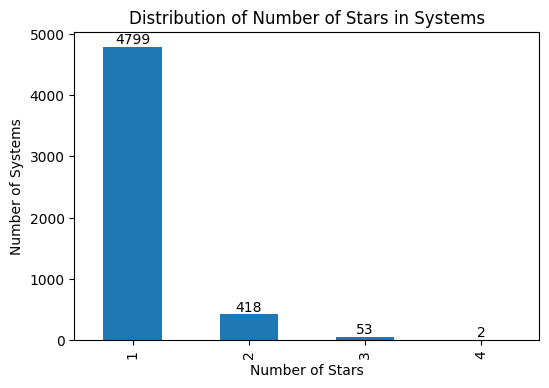

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
# bar plots of number of stars
ax = df['sy_snum'].value_counts().plot(kind='bar', ax=ax)
ax.set_xlabel('Number of Stars')
ax.set_ylabel('Number of Systems')
ax.set_title('Distribution of Number of Stars in Systems')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

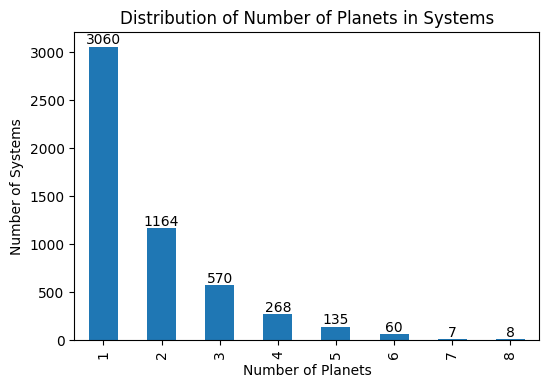

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
# bar plots of number of planets.
ax = df['sy_pnum'].value_counts().sort_index().plot(kind='bar', ax=ax)
ax.set_xlabel('Number of Planets')
ax.set_ylabel('Number of Systems')
ax.set_title('Distribution of Number of Planets in Systems')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)


Text(0, 0.5, 'Percentage')

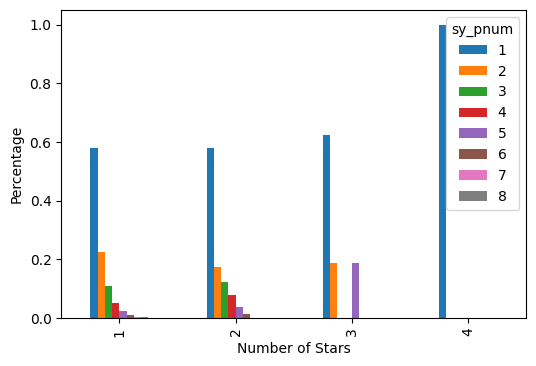

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=300)
# bar plots of number of planets unary and binary systems y-axis is percentage
df.groupby('sy_snum')['sy_pnum'].value_counts(normalize=True).unstack().plot(kind='bar', ax=ax)

ax.set_xlabel('Number of Stars')
ax.set_ylabel('Percentage')


Text(0.5, 1.0, 'Bias on discovery methods')

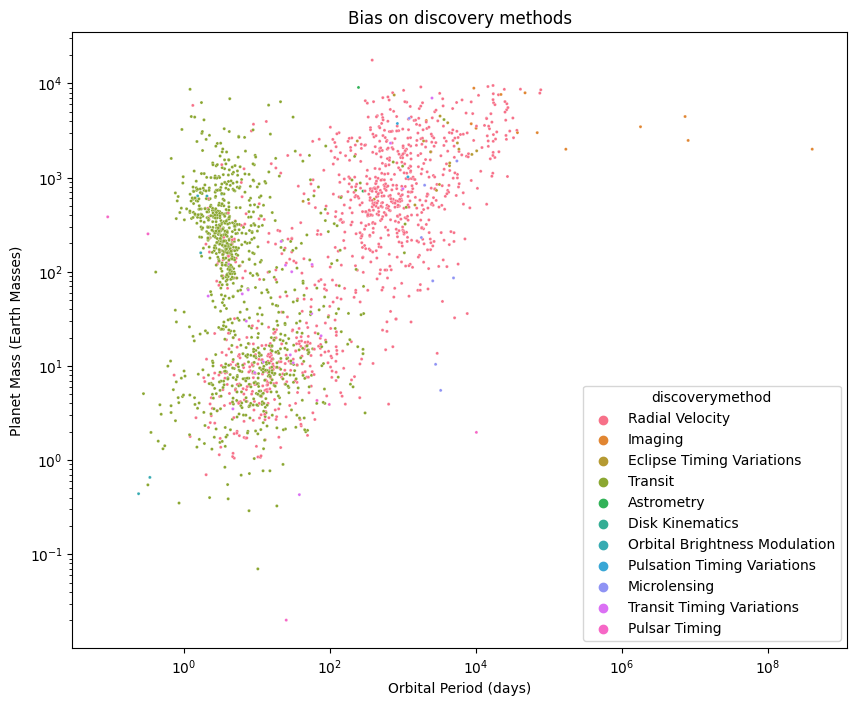

In [7]:
# scatter plot of planet mass vs planet periods with discovery method as hue 
fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=300)
sns.scatterplot(data=df, x='pl_orbper', y='pl_bmasse', hue='discoverymethod', ax=ax, s=5)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Orbital Period (days)')
ax.set_ylabel('Planet Mass (Earth Masses)')
ax.set_title('Bias on discovery methods')

In [8]:
planet_type = pd.read_csv('data/cleaned_5250.csv')['planet_type']

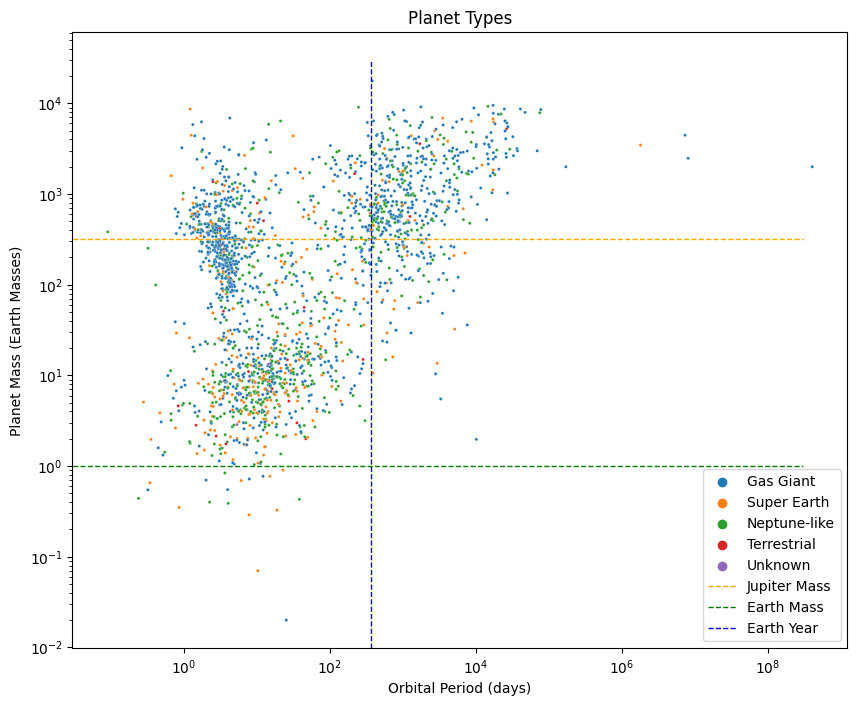

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8), dpi=300)
sns.scatterplot(data=df, x='pl_orbper', y='pl_bmasse', hue=planet_type, ax=ax, s=5)
ax.plot([0, 3e8], [318, 318], color='orange', linestyle='--', linewidth=1, label='Jupiter Mass')
ax.plot([0, 3e8], [1, 1], color='green', linestyle='--', linewidth=1, label='Earth Mass')
ax.plot([365.25, 365.25], [0, 3e4], color='blue', linestyle='--', linewidth=1, label='Earth Year')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Orbital Period (days)')
ax.set_ylabel('Planet Mass (Earth Masses)')
ax.set_title('Planet Types')
ax.legend()